In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


A la hora de aumentar las muestras de pacientes con Stroke hemos decidido buscar otro dataset y mergearlo con el orginial.

In [2]:
data_1=pd.read_csv("/content/heart_disease_health_indicators_BRFSS2015.csv")
data_1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [18]:
data_1.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.0,10292.000000,10292.000000,10292.000000,...,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000
mean,0.382530,0.740867,0.646716,0.984940,29.030023,0.590944,1.0,0.660805,0.612223,0.602895,...,0.960260,0.131170,3.435970,5.714341,10.556549,0.489409,0.447532,9.917995,4.686067,4.758647
std,0.486029,0.438180,0.478013,0.121798,6.935323,0.491683,0.0,0.926975,0.487267,0.489322,...,0.195356,0.337602,1.106109,10.006665,12.345999,0.499912,0.497264,2.388242,1.069115,2.225734
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,3.000000
50%,0.000000,1.000000,1.000000,1.000000,28.000000,1.000000,1.0,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,10.000000,5.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,1.0,2.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,5.000000,25.000000,1.000000,1.000000,12.000000,6.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.0,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Se observa que Age va en un rango de 1 a 13, es poco probable que solo hayan utilizado a niños en el estudio por lo que esa variable lo más probable es que se encuentre codificada.

Cardinalidad de la variable objetivo:
Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64


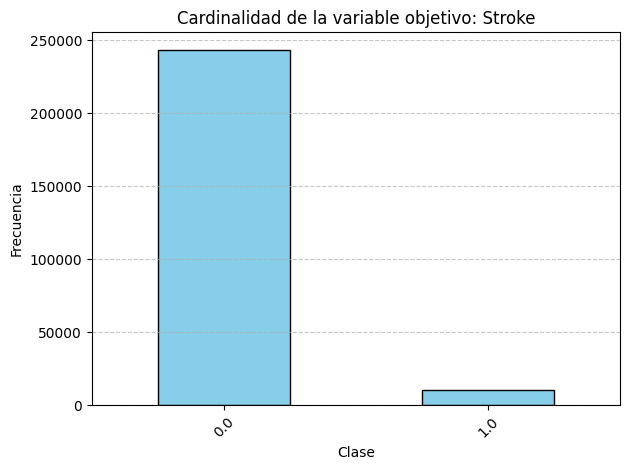

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_cardinalidad_variable_objetivo(data_1, columna_objetivo):
    """
    Muestra la cardinalidad de la variable objetivo con un gráfico de barras.

    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene la variable objetivo.
    columna_objetivo (str): Nombre de la columna objetivo.
    """
    conteo = data_1[columna_objetivo].value_counts()

    # Mostrar conteos por consola (opcional)
    print("Cardinalidad de la variable objetivo:")
    print(conteo)

    # Gráfico
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Cardinalidad de la variable objetivo: {columna_objetivo}')
    plt.xlabel('Clase')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

graficar_cardinalidad_variable_objetivo(data_1, 'Stroke')

In [4]:
data_1 = data_1.drop(data_1[data_1['Stroke'] == 0].index)
print(data_1['Stroke'].value_counts())


Stroke
1.0    10292
Name: count, dtype: int64


In [5]:
data_1.to_csv('stroke_cases_only.csv', index=False)

In [7]:
data_2=pd.read_csv("/content/stroke_dataset.csv")
data_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Cardinalidad de la variable objetivo:
stroke
0    4733
1     248
Name: count, dtype: int64


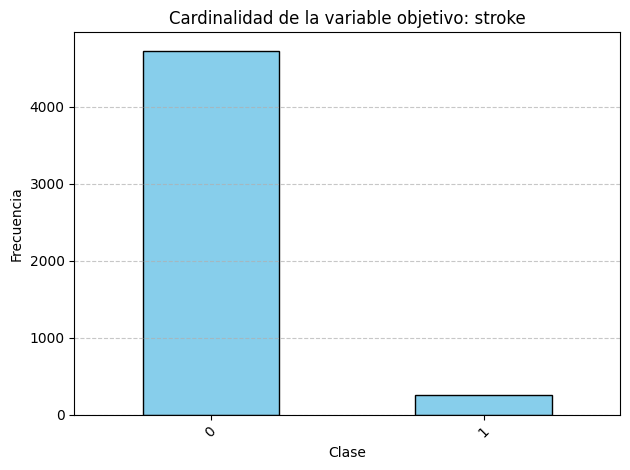

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_cardinalidad_variable_objetivo(data_2, columna_objetivo):
    """
    Muestra la cardinalidad de la variable objetivo con un gráfico de barras.

    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene la variable objetivo.
    columna_objetivo (str): Nombre de la columna objetivo.
    """
    conteo = data_2[columna_objetivo].value_counts()

    # Mostrar conteos por consola (opcional)
    print("Cardinalidad de la variable objetivo:")
    print(conteo)

    # Gráfico
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Cardinalidad de la variable objetivo: {columna_objetivo}')
    plt.xlabel('Clase')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

graficar_cardinalidad_variable_objetivo(data_2, 'stroke')


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 14 to 253671
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  10292 non-null  float64
 1   HighBP                10292 non-null  float64
 2   HighChol              10292 non-null  float64
 3   CholCheck             10292 non-null  float64
 4   BMI                   10292 non-null  float64
 5   Smoker                10292 non-null  float64
 6   Stroke                10292 non-null  float64
 7   Diabetes              10292 non-null  float64
 8   PhysActivity          10292 non-null  float64
 9   Fruits                10292 non-null  float64
 10  Veggies               10292 non-null  float64
 11  HvyAlcoholConsump     10292 non-null  float64
 12  AnyHealthcare         10292 non-null  float64
 13  NoDocbcCost           10292 non-null  float64
 14  GenHlth               10292 non-null  float64
 15  MentHlth              

Cardinalidad de la variable objetivo:
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64


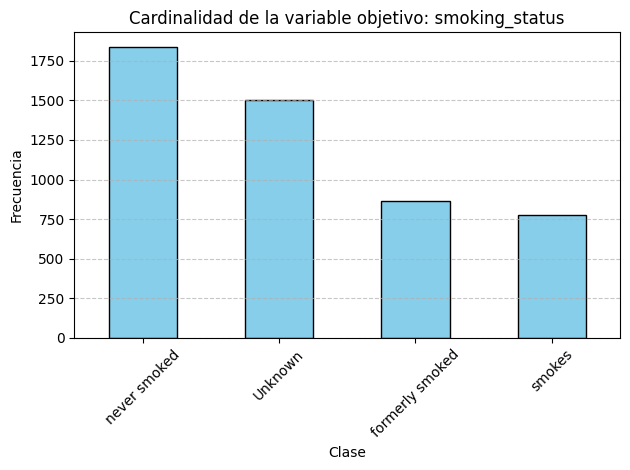

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_cardinalidad_variable_objetivo(data_2, columna_objetivo):
    """
    Muestra la cardinalidad de la variable objetivo con un gráfico de barras.

    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene la variable objetivo.
    columna_objetivo (str): Nombre de la columna objetivo.
    """
    conteo = data_2[columna_objetivo].value_counts()

    # Mostrar conteos por consola (opcional)
    print("Cardinalidad de la variable objetivo:")
    print(conteo)

    # Gráfico
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Cardinalidad de la variable objetivo: {columna_objetivo}')
    plt.xlabel('Clase')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

graficar_cardinalidad_variable_objetivo(data_2, 'smoking_status')

In [13]:
import pandas as pd

# --- Preprocesamiento de data_2 ---
# Seleccionamos solo las columnas relevantes de data_2
data_2_subset = data_2[['age', 'gender', 'hypertension', 'heart_disease', 'stroke', 'bmi', 'smoking_status']].copy()

# Renombramos columnas para que coincidan con data_1
data_2_subset.rename(columns={
    'age': 'Age',
    'gender': 'Sex',
    'hypertension': 'HighBP',
    'heart_disease': 'HeartDiseaseorAttack',
    'stroke': 'Stroke',
    'bmi': 'BMI',
    'smoking_status': 'Smoker'
}, inplace=True)

# Mapeamos 'Sex' (Male -> 1, Female -> 0)
data_2_subset['Sex'] = data_2_subset['Sex'].map({'Male': 1, 'Female': 0})

# Binarizamos 'Smoker' según tu elección:
data_2_subset['Smoker'] = data_2_subset['Smoker'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 1,
    'Unknown': 0
})

# --- Preprocesamiento de data_1 ---
# Seleccionamos las mismas columnas que en data_2
data_1_subset = data_1[['Age', 'Sex', 'HighBP', 'HeartDiseaseorAttack', 'Stroke', 'BMI', 'Smoker']].copy()

# --- Unimos ambos datasets ---
data_final = pd.concat([data_1_subset, data_2_subset], ignore_index=True)

# Opcional: revisar si hay valores nulos
print(data_final.isnull().sum())



Age                     0
Sex                     0
HighBP                  0
HeartDiseaseorAttack    0
Stroke                  0
BMI                     0
Smoker                  0
dtype: int64


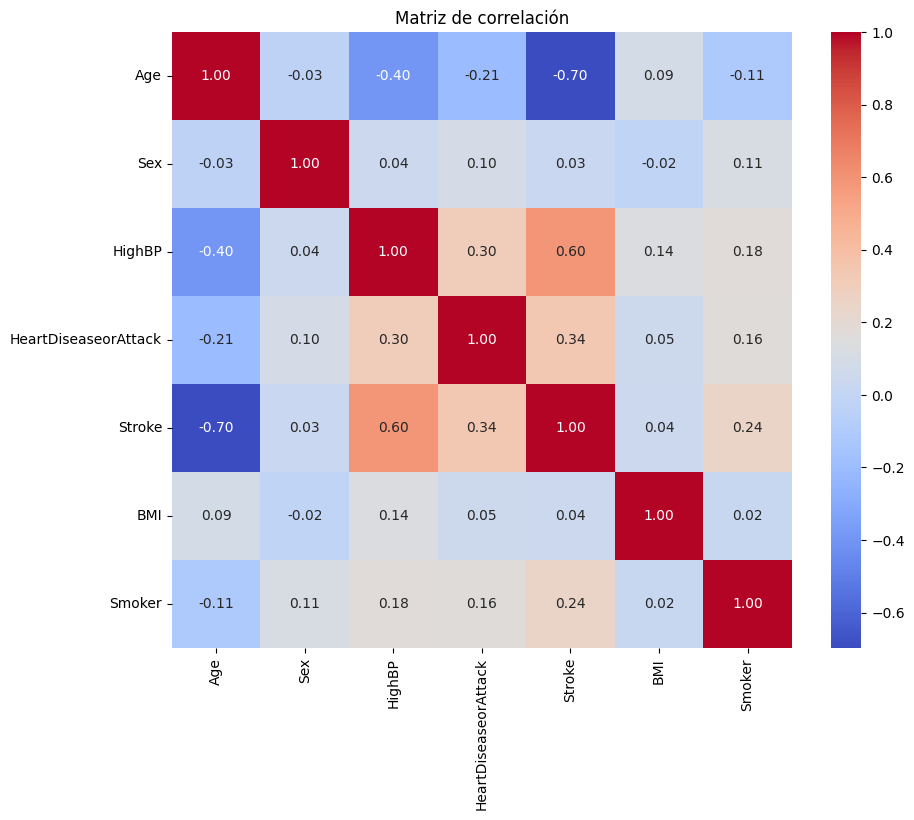

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
corr = data_final.corr()

# Mostramos la matriz de correlación como heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


In [15]:
X = data_final.drop("Stroke", axis=1)
y = data_final["Stroke"]
print(X.shape)

(15273, 6)


In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

# Asumiendo que tienes tus datos X e y ya definidos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Distribución original en y_train:", Counter(y_train))

# Aplicar SMOTE para balancear las clases
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# print("Después de aplicar SMOTE:", Counter(y_train_res))

# Definir y entrenar el modelo XGBClassifier con los hiperparámetros especificados
model = XGBClassifier(
    colsample_bytree=1,
    eval_metric='logloss',
    gamma=0,
    learning_rate=1,
    max_depth=16,
    n_estimators=125,
    random_state=42,
    reg_alpha=0.1,
    reg_lambda=1,
    subsample=1,
    use_label_encoder=False
)

# Entrenar el modelo con los datos balanceados
model.fit(X_train, y_train)

# El modelo ya está entrenado y listo para usar
print("Modelo entrenado exitosamente!")

Distribución original en y_train: Counter({1.0: 8432, 0.0: 3786})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo entrenado exitosamente!


In [ ]:
# Puedes hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# O obtener probabilidades
y_proba = model.predict_proba(X_test)

# También puedes evaluar el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       947
         1.0       0.98      0.97      0.98      2108

    accuracy                           0.97      3055
   macro avg       0.96      0.97      0.97      3055
weighted avg       0.97      0.97      0.97      3055



# Comprobación del modelo con casos aleatorios del test

In [ ]:
import numpy as np

# Seleccionamos un índice aleatorio del test set
random_idx = np.random.choice(X_test.index)

# Obtenemos la fila correspondiente
X_sample = X_test.loc[random_idx].to_frame().T
y_true = y_test.loc[random_idx]

print("Fila seleccionada (features):")
print(X_sample)
print("Valor real (ground truth):", y_true)


Fila seleccionada (features):
       Age  Sex  HighBP  HeartDiseaseorAttack   BMI  Smoker
11062  1.0  1.0     0.0                   0.0  21.4     0.0
Valor real (ground truth): 0.0


In [ ]:
# Hacemos la predicción
y_pred = model.predict(X_sample)

print("Predicción del modelo:", y_pred[0])


Predicción del modelo: 0


In [ ]:
import numpy as np

# Número de muestras aleatorias que quieres evaluar
n_samples = 100

# Asegurarnos de que no cogemos más muestras de las que tenemos
n_samples = min(n_samples, len(X_test))

# Seleccionar índices aleatorios
random_indices = np.random.choice(X_test.index, size=n_samples, replace=False)

# Inicializamos contador de aciertos
correct_predictions = 0

# Iteramos sobre las muestras
for idx in random_indices:
    X_sample = X_test.loc[idx].to_frame().T
    y_true = y_test.loc[idx]
    y_pred = model.predict(X_sample)

    if y_pred[0] == y_true:
        correct_predictions += 1

# Calculamos el porcentaje de acierto
accuracy = correct_predictions / n_samples

print(f"Total de muestras evaluadas: {n_samples}")
print(f"Aciertos: {correct_predictions}")
print(f"Precisión sobre las muestras aleatorias: {accuracy*100:.2f}%")


Total de muestras evaluadas: 100
Aciertos: 98
Precisión sobre las muestras aleatorias: 98.00%


In [ ]:
import numpy as np

# Filtramos los subconjuntos según el valor de Stroke (asumiendo que Stroke es la variable objetivo)
X_test_stroke_0 = X_test[y_test == 0]
X_test_stroke_1 = X_test[y_test == 1]

y_test_stroke_0 = y_test[y_test == 0]
y_test_stroke_1 = y_test[y_test == 1]

# Número de muestras a tomar (máximo 50 o lo que haya disponible)
n_samples_0 = min(50, len(X_test_stroke_0))
n_samples_1 = min(50, len(X_test_stroke_1))

# Seleccionamos índices aleatorios de cada grupo
indices_0 = np.random.choice(X_test_stroke_0.index, size=n_samples_0, replace=False)
indices_1 = np.random.choice(X_test_stroke_1.index, size=n_samples_1, replace=False)

# Inicializamos contadores
correct_0 = 0
correct_1 = 0

# Evaluamos Stroke = 0
for idx in indices_0:
    X_sample = X_test.loc[idx].to_frame().T
    y_true = y_test.loc[idx]
    y_pred = model.predict(X_sample)

    if y_pred[0] == y_true:
        correct_0 += 1

# Evaluamos Stroke = 1
for idx in indices_1:
    X_sample = X_test.loc[idx].to_frame().T
    y_true = y_test.loc[idx]
    y_pred = model.predict(X_sample)

    if y_pred[0] == y_true:
        correct_1 += 1

# Resultados
accuracy_0 = correct_0 / n_samples_0
accuracy_1 = correct_1 / n_samples_1

print(f"Resultados sobre Stroke=0: {correct_0}/{n_samples_0} ({accuracy_0*100:.2f}%)")
print(f"Resultados sobre Stroke=1: {correct_1}/{n_samples_1} ({accuracy_1*100:.2f}%)")


Resultados sobre Stroke=0: 47/50 (94.00%)
Resultados sobre Stroke=1: 49/50 (98.00%)


                Feature  Importance
0                   Age    0.449728
2                HighBP    0.255840
5                Smoker    0.134930
3  HeartDiseaseorAttack    0.087572
4                   BMI    0.052794
1                   Sex    0.019136


<ipython-input-23-3582104778>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


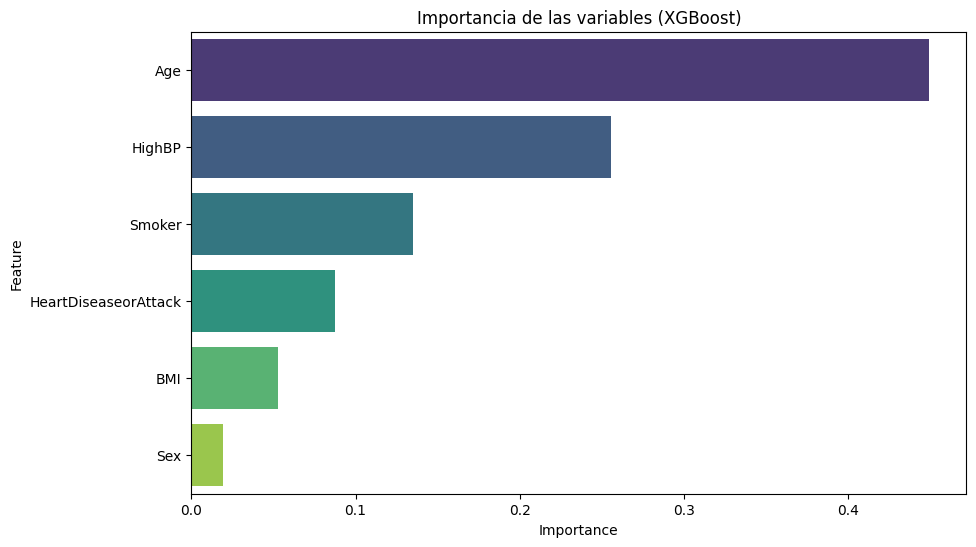

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia de variables
importances = model.feature_importances_

# Crear dataframe con los nombres de las features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenamos por importancia descendente
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Mostramos
print(feature_importance)

# Plot bonito
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Importancia de las variables (XGBoost)')
plt.show()

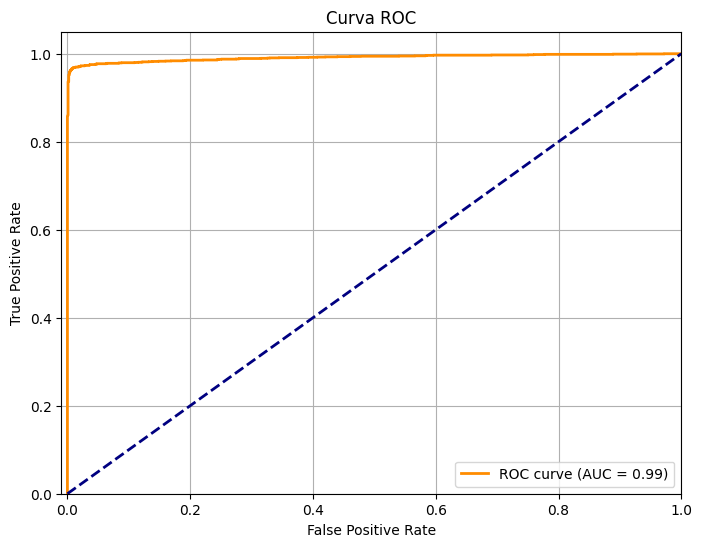

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades predichas para la clase positiva
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import pickle

# Guardar el modelo en un archivo .pkl
with open('modelo_xgb.pkl', 'wb') as f:
    pickle.dump(model, f)
